In [11]:
#Entire Notebook 
#There are net 6 models in our ML PipeLine

^C


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import xgboost as xgb
import tensorflow as tf
from gc import collect
import pandas as pd
import os

In [13]:
df=pd.read_csv("HIGGS.CSV",header=None)
data_set=np.array(df.iloc[:,1:])
label_set=np.array(df.iloc[:,0])
data_set=np.round(data_set,5)
data_set=data_set.astype(np.float32)
label_set=label_set.astype(np.int32)
df_Data_set=pd.DataFrame(data_set)
df_Label_set=pd.DataFrame(label_set)
normed_df_Data_set = ((df_Data_set - df_Data_set.min()) / (df_Data_set.max() - df_Data_set.min())).astype(np.float32)
normed_df_Data_set.to_csv("DataSetNormalised.csv")
df_Label_set.to_csv("LabelSet.csv")
#------------------------------------------------------------


In [14]:
df_data=pd.read_csv("DataSetNormalised.csv")
df_label=pd.read_csv("LabelSet.csv")
x=np.array(df_data.iloc[:,1:])
y=np.array(df_label.iloc[:,1])
x=x.astype(np.float32)
x_train=x[:][:10000000]
y_train=y[:][:10000000]
x_test=x[:][10000000:]
y_test=y[:][10000000:]

In [12]:
normed_df_Data_set

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.050286,0.369601,0.564642,0.021253,0.302234,0.062910,0.458154,0.186402,0.0,0.103508,...,0.497833,0.486773,1.0,0.031874,0.038707,0.113156,0.055765,0.038036,0.061924,0.067874
1,0.053521,0.567601,0.603004,0.097277,0.410338,0.097729,0.406137,0.043934,1.0,0.054424,...,0.271923,0.499667,0.0,0.005662,0.031445,0.114120,0.059877,0.041314,0.062247,0.058134
2,0.044327,0.802000,0.030564,0.029457,0.622152,0.098682,0.715906,0.896692,0.0,0.057842,...,0.725909,0.758205,0.0,0.020806,0.045090,0.114118,0.057983,0.042641,0.050959,0.055869
3,0.090465,0.320000,0.768391,0.129367,0.753152,0.168172,0.222741,0.229380,0.0,0.194996,...,0.364120,0.109674,0.0,0.021726,0.041143,0.115758,0.042198,0.046364,0.065316,0.077971
4,0.070221,0.566001,0.936645,0.057322,0.154448,0.055491,0.319775,0.235269,0.0,0.053402,...,0.425140,0.532329,0.0,0.016970,0.057617,0.114235,0.049968,0.061272,0.051523,0.059396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10999995,0.074864,0.708200,0.531054,0.097118,0.345951,0.224923,0.358620,0.879183,0.0,0.145714,...,0.480493,0.841457,1.0,0.018622,0.028159,0.116204,0.065760,0.044546,0.050472,0.054919
10999996,0.029067,0.292001,0.818375,0.061103,0.391357,0.088460,0.558688,0.017989,1.0,0.071006,...,0.456486,0.800867,1.0,0.018739,0.039215,0.119606,0.075558,0.047622,0.057437,0.066455
10999997,0.036016,0.659000,0.936008,0.055004,0.560670,0.097729,0.508838,0.507019,1.0,0.100894,...,0.817271,0.991563,0.0,0.006538,0.032048,0.114361,0.053177,0.103900,0.076656,0.074661
10999998,0.076397,0.524201,0.133552,0.121080,0.332522,0.087833,0.287096,0.866448,0.0,0.047491,...,0.780094,0.123205,0.0,0.019038,0.033915,0.141387,0.057126,0.016474,0.041420,0.048286


In [6]:
   
   
#--------------------------------------------------------------
def DNN5_fc():
    
#Deep Neural Network DNN5
    model=tf.keras.Sequential([
        tf.keras.layers.Dense(300,input_shape=(28,),activation='swish'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300,activation='swish'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300,activation='swish'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300,activation='swish'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(300,activation='swish'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.01,
        beta_1=0.9,
        beta_2=0.999),
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
        )
    model.fit(
        x_train,
        y_train,
        epochs=1,
        batch_size=10240,
        validation_data=(x_test,y_test)
    )
    model.save('DNN_5')

#-----------------------------------------------------------------------------------
def RN52_fc():
    d_rate=0.1 #The rate of droupout for the layers in the ResNet
    act='gelu'#The activation function use ('relu','swish','elu','gelu','selu')
    lr=0.01 #The default learning rate Default 0.01
    mom=0.9 #The momentum parameter Default 0.9
    test_split=1 #Default 1 and range[1,0)
    #Reducing test_split will make the model faster but will also reduce the accuracy of the Validation metric
    #On changing test_split run the lower initialisation cell, marked below**
    
    def identity_block(X,no_nodes,Activation):#A custom Residual identity block with a skip connection
        X_shortcut=X
        #There will be 3 layers in total for the sequential connection
        #Activation will be specified by the user as per the Keras Documentation
        #no_nodes denote the size of the model which will be built
        #Applying Batch Normalisation to size the inputs
        #Layer 1 -----------------------------------------------
        X=tf.keras.layers.Dense(no_nodes,activation=Activation)(X)
        X=tf.keras.layers.BatchNormalization(axis=1)(X)
        X=tf.keras.layers.Dropout(d_rate)(X)
        #--------------------------------------------------------
        #Layer 2-------------------------------------------------
        X=tf.keras.layers.Dense(no_nodes,activation=Activation)(X)
        X=tf.keras.layers.BatchNormalization(axis=1)(X)
        X=tf.keras.layers.Dropout(d_rate)(X)
        #--------------------------------------------------------
        #Layer 3-------------------------------------------------
        X=tf.keras.layers.Dense(no_nodes,activation=Activation)(X)
        X=tf.keras.layers.Dropout(d_rate)(X)
        #--------------------------------------------------------
        #Layer 4-------------------------------------------------
        X= tf.keras.layers.Add()([X_shortcut, X])
        X=tf.keras.layers.Activation('relu')(X)
        #--------------------------------------------------------
        X_shortcut2=X
         #Layer 5 -----------------------------------------------
        X=tf.keras.layers.Dense(no_nodes,activation=Activation)(X)
        X=tf.keras.layers.BatchNormalization(axis=1)(X)
        X=tf.keras.layers.Dropout(d_rate)(X)
        #--------------------------------------------------------
        #Layer 6-------------------------------------------------
        X=tf.keras.layers.Dense(no_nodes,activation=Activation)(X)
        X=tf.keras.layers.BatchNormalization(axis=1)(X)
        X=tf.keras.layers.Dropout(d_rate)(X)
        #--------------------------------------------------------
        #Layer 7-------------------------------------------------
        X=tf.keras.layers.Dense(no_nodes,activation=Activation)(X)
        X=tf.keras.layers.Dropout(d_rate)(X)
        #--------------------------------------------------------
        X= tf.keras.layers.Add()([X_shortcut, X,X_shortcut2])
        #Layer 8-------------------------------------------------
        X=tf.keras.layers.Activation('relu')(X)
        return X
    inputs=tf.keras.layers.Input(shape=(28,))                    #Keras input layer
    X=tf.keras.layers.Dense(300,activation=act)(inputs)
    X=identity_block(X=X,no_nodes=300,Activation=act)
    X=identity_block(X=X,no_nodes=300,Activation=act)
    X=identity_block(X=X,no_nodes=300,Activation=act)
    X=identity_block(X=X,no_nodes=300,Activation=act)
    X=identity_block(X=X,no_nodes=300,Activation=act)        
    outputs=tf.keras.layers.Dense(1,activation='sigmoid')(X)     #keras output layer
    model=tf.keras.Model(inputs,outputs)#Model declaration
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.01,
        beta_1=mom,
        beta_2=0.999),
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
    )
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                 factor=0.5,
                                                 patience=5,
                                                 min_lr=10**-6,
                                                 cooldown=5,
                                                 verbose = True)

    history = History()

    model.fit(
        x_train,
        y_train,
        epochs=100,
        batch_size=20000,
        validation_data=(x_test,y_test),
        callbacks=[cp_callback, reduce_lr, history]
    )
    model.save('ResNet_52')

    with open("sunnyMamoni.txt", "w") as f:
        f.write(str(history.history))
#-----------------------------------------------------------------------------------    
def XGB_fc():
        
    model = XGBClassifier(tree_method='gpu_hist',
                          booster = 'gbtree',
                          max_depth = 14,
                          n_estimators = 300,
                          learning_rate = 0.4,
                          reg_lambda=600
                         ) # booster = gbtree, dart

    eval_set = [(x_test_alpha, y_test_alpha)]

    t0 = time()
    a = model.fit(x_train_alpha,
              y_train_alpha,
              eval_metric="error",
              eval_set=eval_set,
              verbose=True)
    taken = time()-t0

    y_test_alpha_pred = model.predict(x_test_alpha,ntree_limit=model.best_ntree_limit)
    accuracy_test = accuracy_score(y_test_alpha, y_test_alpha_pred)
    print("The testing accuracy", accuracy_test*100)

    y_train_alpha_pred=model.predict(x_train_alpha,ntree_limit=model.best_ntree_limit)
    accuracy_train = accuracy_score(y_train_alpha, y_train_alpha_pred)
    print("The training accuracy", accuracy_train*100)
    model.save_model("XGBoost.json")
#------------------------------------------------------
def S1024_fc():

    model=tf.keras.Sequential([
        tf.keras.layers.Dense(1024,input_shape=(28,),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1024,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128,activation='swish'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1,activation='sigmoid')
        ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.0001,
        beta_1=0.9,
        beta_2=0.999),
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
        )
    model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=10240,
    validation_data=(x_test,y_test),
    callbacks=[cp_callback]
        )
    model.save('NN_Shallow_1024')
#-------------------------------------------------------------------
def S2048_fc():
    model=tf.keras.Sequential([
        tf.keras.layers.Dense(2048,input_shape=(28,),activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(2048,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1,activation='sigmoid')
        ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.01,
        beta_1=0.9,
        beta_2=0.999),
        loss='binary_crossentropy',
        metrics=['accuracy','AUC']
        )
    model.fit(
    x_train,
    y_train,
    epochs=1,
    batch_size=10240,
    validation_data=(x_test,y_test),
    callbacks=[cp_callback]
        )
    model.save('NN_Shallow_2048')
#---------------------------------------------------------------------------
def S10240_fc():
    model=tf.keras.Sequential([
    tf.keras.layers.Dense(10240,input_shape=(28,),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999),
    loss='binary_crossentropy',
    metrics=['accuracy','AUC']
    )
    model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=10240,
    callbacks=[cp_callback]
    )
    model.save('NN_Shallow_2048')
#----------------------------------------------------------------------------


In [7]:
def ens_fc(x_test):    
    model_xgb=XGBClassifier()
    model_xgb.load_model("XGBoost.json")
    y_test_pred_xgb=model_xgb.predict_proba(x_test)
    y_pred_xgb=y_test_pred_xgb[:,1]
    y_test_pred_xgb=np.reshape(y_pred_xgb,(1000000,1))
    model_DNN_5 = tf.keras.models.load_model('DNN_5')
    y_test_pred_DNN_5=model_DNN_5.predict(x_test)
    model_NN_Shallow_1024 = tf.keras.models.load_model('NN_Shallow_1024')
    y_test_pred_NN_Shallow_1024=model_NN_Shallow_1024.predict(x_test)
    model_NN_Shallow_2048 = tf.keras.models.load_model('NN_Shallow_2048')
    y_test_pred_NN_Shallow_2048=model_NN_Shallow_2048.predict(x_test)
    model_NN_Shallow_10240 = tf.keras.models.load_model('NN_Shallow_10240')
    y_test_pred_NN_Shallow_10240=model_NN_Shallow_10240.predict(x_test)
    model_ResNet_52 = tf.keras.models.load_model('ResNet_52')
    y_test_pred_model_ResNet_52=model_ResNet_52.predict(x_test)

    """
    for i in range(10000):
    pre=(np.random.rand(6,1))
    y_pred_ensemble=y_test_pred_DNN_5*pre[0]
    y_pred_ensemble=y_pred_ensemble+y_test_pred_model_ResNet_52*pre[1]
    y_pred_ensemble=y_pred_ensemble+y_test_pred_NN_Shallow_1024*pre[2]
    y_pred_ensemble=y_pred_ensemble+y_test_pred_NN_Shallow_10240*pre[3]
    y_pred_ensemble=y_pred_ensemble+y_test_pred_NN_Shallow_2048*pre[4]
    y_pred_ensemble=y_pred_ensemble+y_test_pred_xgb*pre[5]
    y_pred_ensemble=y_pred_ensemble/(pre[0]+pre[1]+pre[2]+pre[3]+pre[4]+pre[5])
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_ensemble)
    auc=metrics.auc(fpr, tpr)
    if auc>auc_max:
        auc_max=auc
        print("New Max detected")
        print("Auc",auc)
        print("--------------------------------------------")
        pre_max=pre
    if i%1000==0:
        print(str(i))
    The above code is used to find the fine-tuned values for ensembling all the models
    """
    pre=(0.9874,0.5109,0.4046,0.00178,0.18467,0.17939)
    y_pred_ensemble=y_test_pred_DNN_5*pre[0]
    y_pred_ensemble=y_pred_ensemble+y_test_pred_model_ResNet_52*pre[1]
    y_pred_ensemble=y_pred_ensemble+y_test_pred_NN_Shallow_1024*pre[2]
    y_pred_ensemble=y_pred_ensemble+y_test_pred_NN_Shallow_10240*pre[3]
    y_pred_ensemble=y_pred_ensemble+y_test_pred_NN_Shallow_2048*pre[4]
    y_pred_ensemble=y_pred_ensemble+y_test_pred_xgb*pre[5]
    y_pred_ensemble=y_pred_ensemble/(pre[0]+pre[1]+pre[2]+pre[3]+pre[4]+pre[5])
    #ntgt() Used for fine tuning of model, please dont uncomment it
    return y_pred_ensemble    


In [15]:
y_pred=ens_fc(x_test) #Send the data set X(After normalisation min-max)
#keep y_test as the testing data set

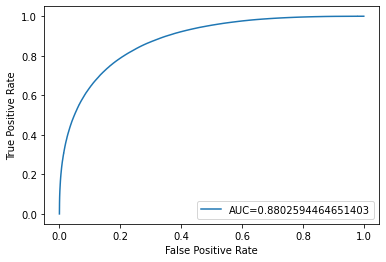

In [20]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()